In this notebook:
1. Train a simple MLP neural network with one hidden layer and a normal activation function
2. Iteratively prune weights (ie set to zero) around a region beginning at 0.01 and doubling until it reduces the accuracy by 15%. Prune a different copy of the network by specfiying a sparsity n and dropping the lowest nth percentile of weights. Compare the two resultant networks
3. Retrain the network over 30 epochs using a steepening activation function which ends as a binary decision in the last epoch
4. Visualise the weights as how they interpret an image (ie what lines they might look for) and begin looking at what are the best ones

In [1]:
#TODO:
#backpropogate to get the 'perfect' 0 etc.
#look at activation patterns

#try and plot the activation coming out the first layer to see if it tends to be sparse.
#If so, look beyond for all the numbers which arent caused by many features

#for the end layers which are noisy, try re-intialising them and training slightly

import numpy as np
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)


import network
simple_net = network.Network([784,30,10])
simple_net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0 : 9113 / 10000
Epoch 1 : 9249 / 10000
Epoch 2 : 9330 / 10000
Epoch 3 : 9404 / 10000
Epoch 4 : 9416 / 10000
Epoch 5 : 9422 / 10000
Epoch 6 : 9447 / 10000
Epoch 7 : 9455 / 10000
Epoch 8 : 9480 / 10000
Epoch 9 : 9501 / 10000
Epoch 10 : 9518 / 10000
Epoch 11 : 9510 / 10000
Epoch 12 : 9499 / 10000
Epoch 13 : 9494 / 10000
Epoch 14 : 9507 / 10000
Epoch 15 : 9511 / 10000
Epoch 16 : 9491 / 10000
Epoch 17 : 9519 / 10000
Epoch 18 : 9518 / 10000
Epoch 19 : 9508 / 10000
Epoch 20 : 9516 / 10000
Epoch 21 : 9527 / 10000
Epoch 22 : 9497 / 10000
Epoch 23 : 9509 / 10000
Epoch 24 : 9541 / 10000
Epoch 25 : 9513 / 10000
Epoch 26 : 9512 / 10000
Epoch 27 : 9496 / 10000
Epoch 28 : 9512 / 10000
Epoch 29 : 9517 / 10000


In [2]:
print(test_data)

In [3]:
import pickle
name =  "./Saved_Objects/simple_net.p"
pickle.dump( simple_net, open( name, "wb" ) )

## Checkpoint 1

In [1]:
import numpy as np
import pickle
import prune
name =  "./Saved_Objects/simple_net.p"
simple_net = pickle.load( open( name, "rb" ) )

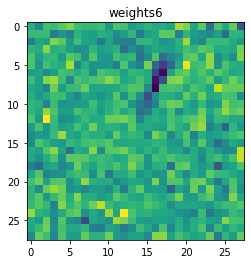

In [4]:
import matplotlib.pyplot as plt
img = simple_net.weights[0][6].reshape(28,28)
plt.imshow(img, interpolation='nearest')

s = 'weights' + str(6) 
plt.title(s)
plt.show()

In [2]:
import matplotlib.pyplot as plt
img = simple_net.weights[0][14].reshape(28,28)
plt.imshow(img, interpolation='nearest')
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
import numpy as np
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)
validation_data = list(validation_data)

In [4]:
simple_net.weights[0][0][0]

1.475390345476384

In [5]:
pruned_net = prune.prune_retrain(simple_net,0.01, training_data, test_data,threshold=0.15, verbose=True, validation_data=validation_data)

[784, 30, 10] [784, 30, 10]
9549 / 10000  without prune
9549 / 10000  around region ± 0.01 , sparsity =  0.6045340050377834 %
9549 / 10000  around region ± 0.02 , sparsity =  1.3056255247691015 %
9549 / 10000  around region ± 0.04 , sparsity =  2.6028547439126783 %
9552 / 10000  around region ± 0.08 , sparsity =  5.566750629722922 %
9548 / 10000  around region ± 0.16 , sparsity =  11.46095717884131 %
9540 / 10000  around region ± 0.32 , sparsity =  22.678421494542402 %
9489 / 10000  around region ± 0.64 , sparsity =  43.740554156171285 %
9163 / 10000  around region ± 1.28 , sparsity =  74.70612930310664 %
5536 / 10000  around region ± 2.56 , sparsity =  96.67926112510496 %
Epoch 0 complete
Epoch 1 complete
Epoch with pruned weights around 2.56: 9105 / 10000
sparsity:  23029  /  23820  =  96.67926112510496 %


In [6]:
simple_net.weights[0][0][0]

0.0

In [5]:
pruned_net_conv = prune.prune_to(simple_net, 75, training_data, test_data, validation_data=validation_data)

0.5536  around region ± 0.0
Epoch 0 complete
Epoch 1 complete
sparsity:  0.9667926112510495
Epoch with pruned weights around 0.0: 9089 / 10000


In [5]:
pruned_net_conv2 = prune.prune_to(simple_net, 80, training_data, test_data, validation_data=validation_data)

0.8917  around region ± 1.437560572193935
Epoch 0 complete
Epoch 1 complete
sparsity:  0.8
Epoch with pruned weights around 1.437560572193935: 9510 / 10000


In [4]:
pruned_net_conv3 = prune.prune_to(simple_net, 85, training_data, test_data, validation_data=validation_data)

0.8873  around region ± 1.6269518252271398
Epoch 0 complete
Epoch 1 complete
sparsity:  0.85
Epoch with pruned weights around 1.6269518252271398: 9444 / 10000


In [5]:
name =  "./Saved_Objects/simple_net.p"
simple_net = pickle.load( open( name, "rb" ) )

In [6]:
import prune_alt
hard_pruned_net = prune_alt.prune_retrain_alt(simple_net,start=1.0,threshold=0.05, increment=0.1)

0.9549  without prune
0.9404  around region ± 1.0 , sparsity:  62.90512174643157 %
0.9404  around region ± 1.1 , sparsity:  67.53988245172124 %
0.9307  around region ± 1.2000000000000002 , sparsity:  71.51553316540722 %
0.9068  around region ± 1.3000000000000003 , sparsity:  75.47858942065491 %
0.9017  around region ± 1.4000000000000004 , sparsity:  78.8287153652393 %
0.8725  around region ± 1.5000000000000004 , sparsity:  81.79261125104954 %
0.8825  around region ± 1.6000000000000005 , sparsity:  84.39546599496222 %
0.8671  around region ± 1.7000000000000006 , sparsity:  86.55331654072208 %
0.8448  around region ± 1.8000000000000007 , sparsity:  88.56842989084802 %
0.8138  around region ± 1.9000000000000008 , sparsity:  90.30226700251889 %
0.7788  around region ± 2.000000000000001 , sparsity:  91.87237615449202 %
0.7412  around region ± 2.100000000000001 , sparsity:  93.12342569269522 %
0.717  around region ± 2.200000000000001 , sparsity:  94.06801007556676 %
0.6195  around region ± 2

In [7]:
pickle.dump( pruned_net_conv3, open( "./Saved_Objects/pruned_conventionally.p", "wb" ) )
pickle.dump( hard_pruned_net, open( "./Saved_Objects/hard_pruned.p", "wb" ) )

## Checkpoint 2

In [8]:
import numpy as np
import pickle
# Pick one - see above for differences in training and results
pruned_net = pickle.load( open( "./Saved_Objects/pruned_conventionally.p", "rb" ) ) #more accurate before and after ruling
#pruned_net = pickle.load( open( "./Saved_Objects/hard_pruned.p", "rb" ) ) # more sparse

In [9]:
import networksteep
rule_net = networksteep.Network([784,30,10])
rule_net.weights = pruned_net.weights
rule_net.biases = pruned_net.biases

import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
rule_net.SGD(training_data,30,10,3.0,test_data=test_data)

Epoch 0 : 9457 / 10000
Epoch 1 : 9421 / 10000
Epoch 2 : 9429 / 10000
Epoch 3 : 9416 / 10000
Epoch 4 : 9411 / 10000
Epoch 5 : 9412 / 10000


/home/jovyan/work/neuralrules-mnist/networksteep.py:216: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(- z * step))


Epoch 6 : 9396 / 10000
Epoch 7 : 9397 / 10000
Epoch 8 : 9394 / 10000
Epoch 9 : 9398 / 10000
Epoch 10 : 9406 / 10000
Epoch 11 : 9388 / 10000
Epoch 12 : 9391 / 10000
Epoch 13 : 9395 / 10000
Epoch 14 : 9394 / 10000
Epoch 15 : 9387 / 10000
Epoch 16 : 9384 / 10000
Epoch 17 : 9385 / 10000
Epoch 18 : 9386 / 10000
Epoch 19 : 9379 / 10000
Epoch 20 : 9369 / 10000
Epoch 21 : 9379 / 10000
Epoch 22 : 9366 / 10000
Epoch 23 : 9384 / 10000
Epoch 24 : 9381 / 10000
Epoch 25 : 9381 / 10000
Epoch 26 : 9364 / 10000
Epoch 27 : 9377 / 10000
Epoch 28 : 9145 / 10000
Epoch 29 : 9145 / 10000


In [10]:
import prune
s,t = prune.get_sparsity(rule_net)
print(s/t * 100)

85.0


In [11]:
pickle.dump( rule_net, open( "./Saved_Objects/rule_net.p", "wb" ) )

## Checkpoint 3

In [12]:
import numpy as np
import pickle
rule_net = pickle.load( open( "./Saved_Objects/rule_net.p", "rb" ) )

In [13]:
import prune
prune.get_sparsity(rule_net.weights[1])

AttributeError: 'numpy.ndarray' object has no attribute 'weights'

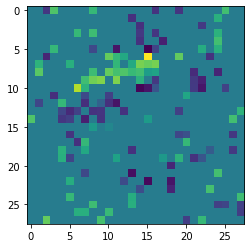

In [14]:
import matplotlib.pyplot as plt
img = rule_net.weights[0][0].reshape(28,28)
plt.imshow(img, interpolation='nearest')
plt.show()

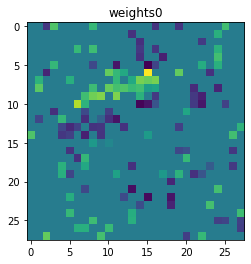

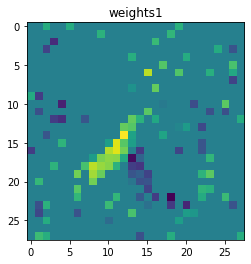

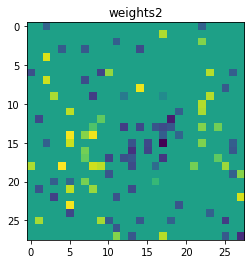

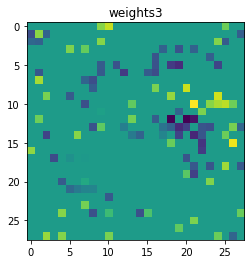

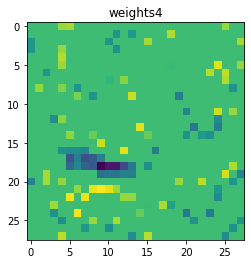

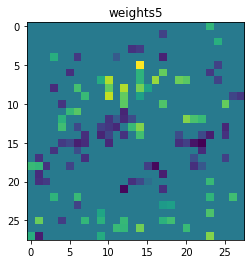

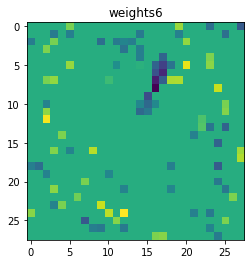

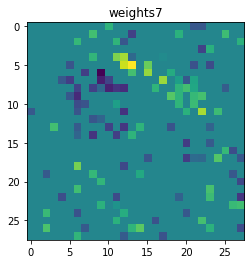

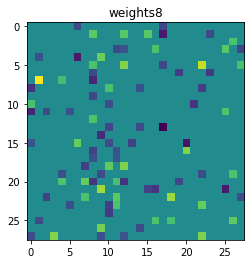

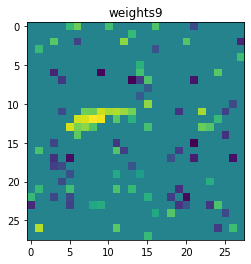

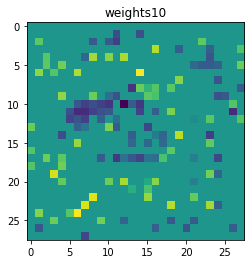

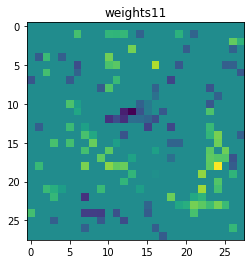

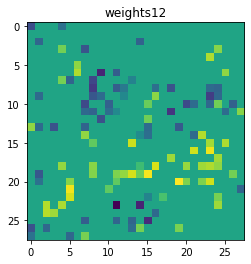

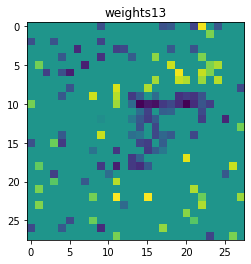

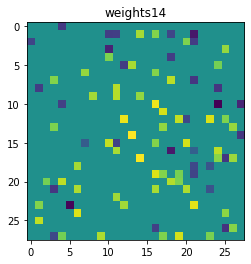

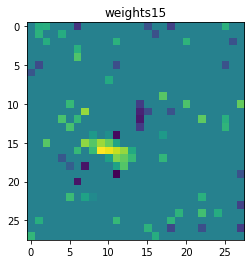

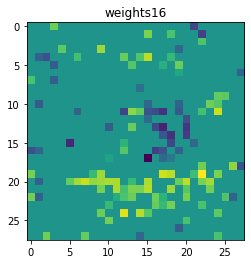

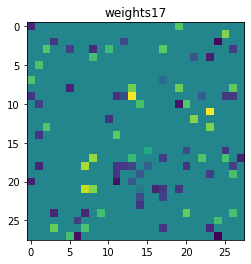

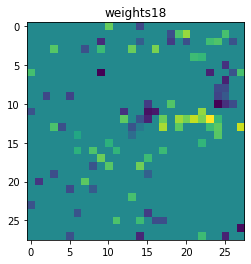

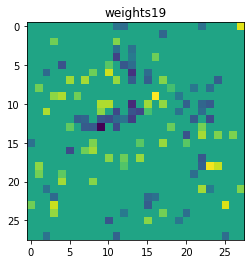

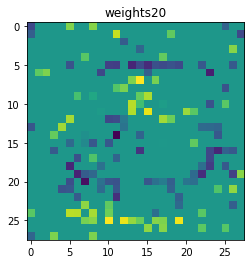

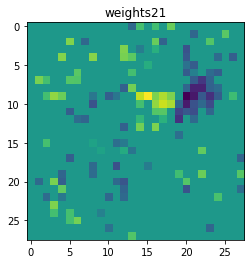

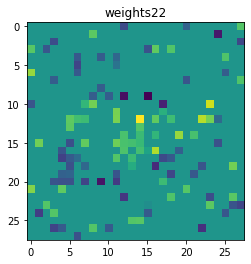

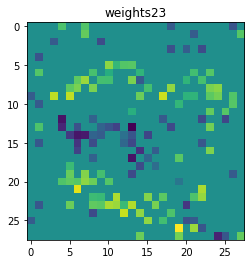

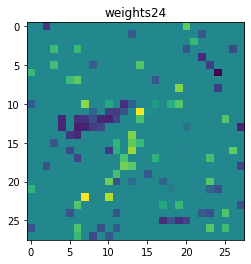

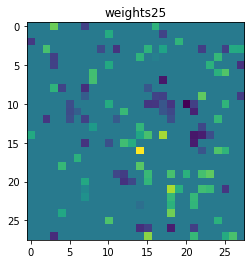

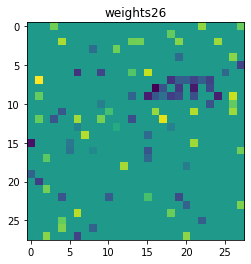

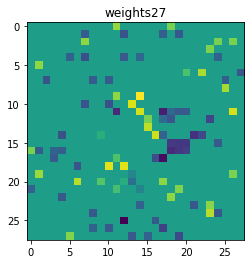

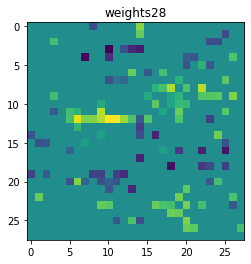

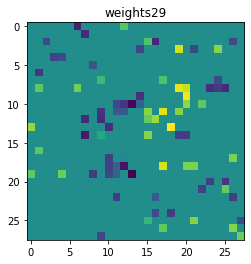

In [15]:

for i in range(30):
    img = rule_net.weights[0][i].reshape(28,28)
    plt.imshow(img, interpolation='nearest')
   
    s = 'weights' + str(i) 
    plt.title(s)
    plt.show()
    #plt.savefig(s + '.png')


In [17]:
import prune_alt
alt_pruned = prune_alt.prune_retrain_alt(simple_net, start = 0.15, threshold=0.1)

0.9504  without prune
0.95  around region ± 0.15
0.9506  around region ± 0.3
0.9503  around region ± 0.44999999999999996
0.9484  around region ± 0.6
0.9456  around region ± 0.75
0.9379  around region ± 0.9
0.9318  around region ± 1.05
0.9197  around region ± 1.2
0.8999  around region ± 1.3499999999999999
0.869  around region ± 1.4999999999999998
0.824  around region ± 1.6499999999999997
0.7139  around region ± 1.7999999999999996
Epoch 0 complete
Epoch 1 complete
Epoch with pruned weights around 0.9749999999999998: 9466 / 10000
sparsity:  20283  / 23820 =  85.15113350125945 %


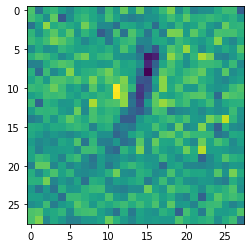

In [22]:
img = simple_net.weights[0][0].reshape(28,28)
plt.imshow(img, interpolation='nearest')

In [18]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
alt_pruned.SGD(training_data, 3, 10, 3.0, test_data=test_data)

Epoch 0 : 9470 / 10000
Epoch 1 : 9490 / 10000
Epoch 2 : 9484 / 10000


In [19]:
import networksteep
alt_rule_net = networksteep.Network([784,30,10])
alt_rule_net.weights = alt_pruned.weights
alt_rule_net.biases = alt_pruned.biases

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
alt_rule_net.SGD(training_data,30,10,3.0,test_data=test_data)

Epoch 0 : 9497 / 10000
Epoch 1 : 9440 / 10000
Epoch 2 : 9458 / 10000
Epoch 3 : 9415 / 10000
Epoch 4 : 9427 / 10000
Epoch 5 : 9410 / 10000
Epoch 6 : 9424 / 10000
Epoch 7 : 9405 / 10000
Epoch 8 : 9416 / 10000
Epoch 9 : 9367 / 10000
Epoch 10 : 9387 / 10000
Epoch 11 : 9357 / 10000
Epoch 12 : 9356 / 10000
Epoch 13 : 9365 / 10000
Epoch 14 : 9333 / 10000
Epoch 15 : 9323 / 10000
Epoch 16 : 9337 / 10000
Epoch 17 : 9280 / 10000
Epoch 18 : 9307 / 10000
Epoch 19 : 9327 / 10000
Epoch 20 : 9276 / 10000
Epoch 21 : 9311 / 10000
Epoch 22 : 9338 / 10000
Epoch 23 : 9202 / 10000
Epoch 24 : 9176 / 10000
Epoch 25 : 9374 / 10000
Epoch 26 : 9090 / 10000
Epoch 27 : 9303 / 10000
Epoch 28 : 8841 / 10000
Epoch 29 : 8981 / 10000


In [20]:
weights10 = alt_rule_net.weights[0]
weights11 = alt_rule_net.weights[1]
r = len(weights10[weights10 == 0.0]) + len(weights11[weights11 == 0.0])
print("sparsity: " , r, " / 23820 = "  , (r/23820) * 100 , "%" )

sparsity:  20283  / 23820 =  85.15113350125945 %


In [25]:
for i in range(30):
    print(np.count_nonzero(alt_rule_net.weights[0][i]))
print(alt_rule_net.weights[0][0].shape)   

113
132
116
125
77
118
121
110
89
109
93
119
113
127
90
110
91
98
120
105
142
112
92
106
142
125
95
114
125
110
(784,)


In [27]:
for i in range(10):
    print(np.count_nonzero(alt_rule_net.weights[1][i]))
    print(alt_rule_net.weights[1][i])
print(alt_rule_net.weights[1][0].shape)   

17
[-0.46360222  0.          0.          0.59167771 -0.70789501  0.
  0.          0.         -0.19449084 -1.27942988 -1.53325758  0.
  0.          0.27066372 -1.21456776  2.07949456  0.          0.65686695
  1.172344    1.0276392   0.          0.         -1.86035628 -0.7240759
 -0.37488021 -0.43151538  0.          0.         -1.25580718  0.        ]
21
[ 0.          0.          0.         -0.30933376 -0.03990819  0.36349618
 -0.20638687  0.74325704 -0.30630128  0.45845325  0.          0.26540058
  0.34130563  0.62488704 -0.27737531 -0.4957304   0.          0.
 -0.25324061 -0.39681049  0.         -0.78272978 -0.65056682  0.
 -0.45256455 -0.08964996  0.50079689 -0.32472256  0.          0.05721896]
19
[-0.85257948  0.          0.79139667  0.         -0.39645881  0.
  0.          0.46829188  0.          0.         -0.87898727  0.
  0.          0.         -0.96566265 -0.72116913 -0.95189922 -0.04015208
  0.49000928  0.          0.96240955  0.92657296 -1.19049688 -0.29227488
  0.25895847  0.

In [41]:
for j in range(30):
    print(j, alt_rule_net.weights[1][0][j])

0 -0.46360222383295535
1 0.0
2 0.0
3 0.5916777129748907
4 -0.7078950115782199
5 0.0
6 0.0
7 0.0
8 -0.19449083676497075
9 -1.2794298770538959
10 -1.5332575801914223
11 0.0
12 0.0
13 0.2706637214891299
14 -1.2145677601718528
15 2.0794945588451506
16 0.0
17 0.6568669465866038
18 1.1723440032832342
19 1.0276392010313757
20 0.0
21 0.0
22 -1.8603562777454312
23 -0.7240758982174609
24 -0.3748802129419731
25 -0.43151537828826403
26 0.0
27 0.0
28 -1.2558071783002056
29 0.0


0.2706637214891299


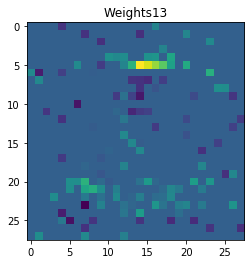

In [56]:
x = 13
print(alt_rule_net.weights[1][0][x])
img = alt_rule_net.weights[0][x].reshape(28,28)
s = 'Weights' + str(x) 
plt.title(s)
plt.imshow(img, interpolation='nearest')
#when the output says its a zero, what patterns of activation led to that result? groups of firings, single path, etc?
#Do this for every valid zero. Create a matrix of all weights patterns and look for correlations. 
#Could you reverse engineer adversarial examples?

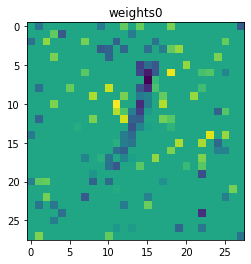

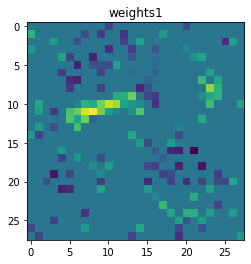

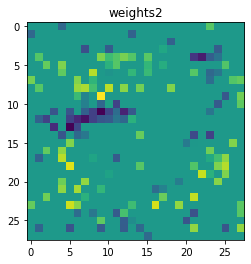

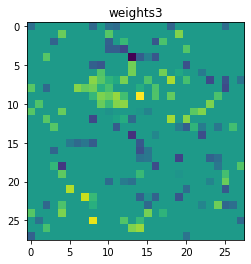

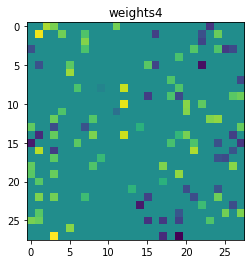

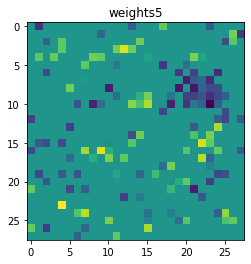

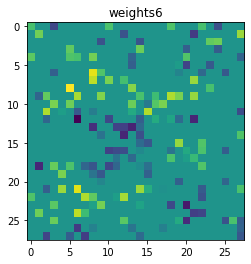

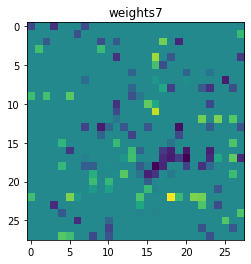

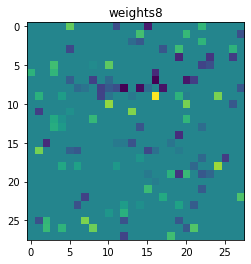

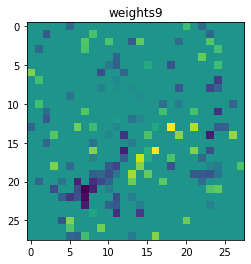

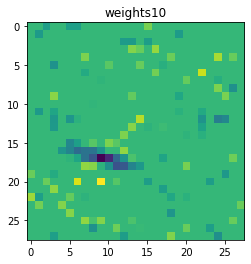

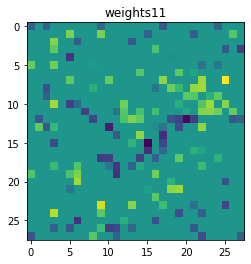

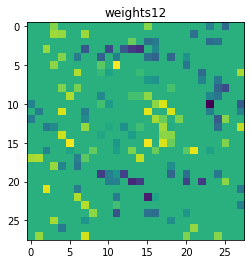

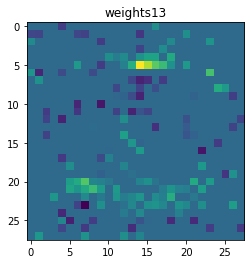

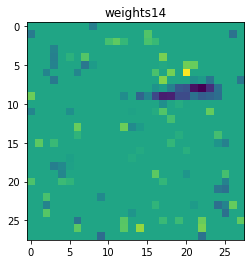

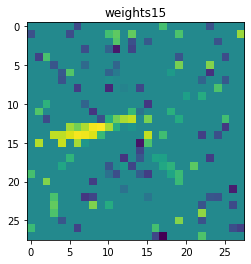

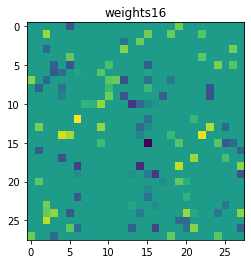

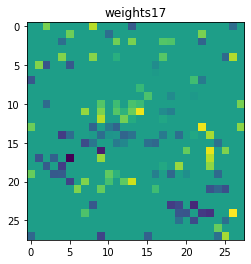

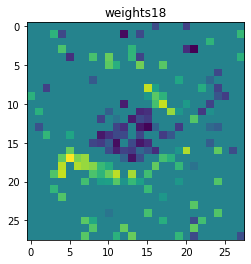

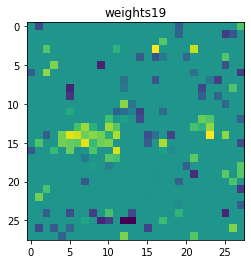

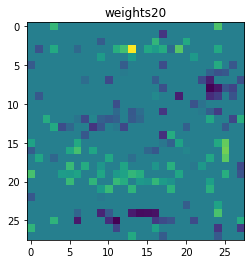

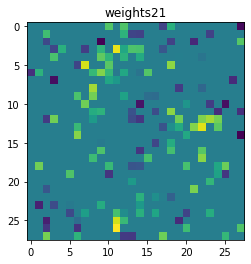

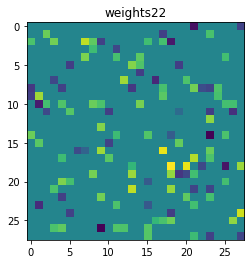

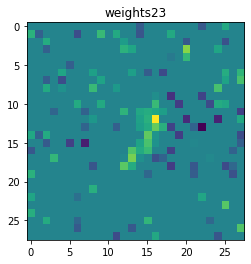

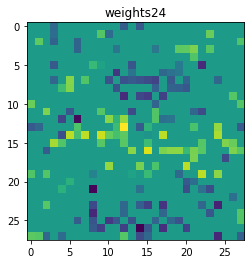

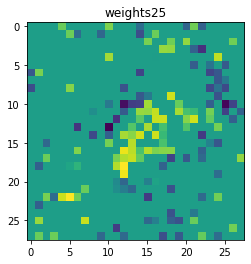

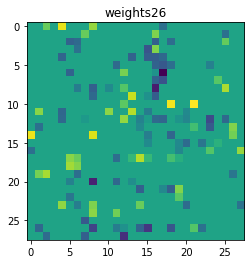

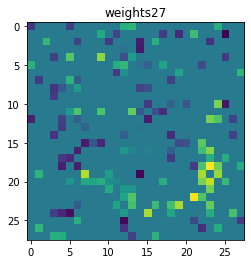

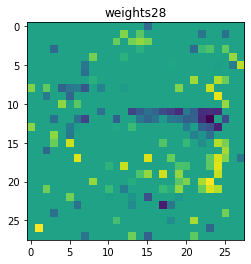

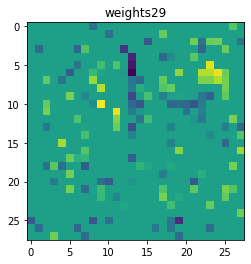

In [14]:
import matplotlib.pyplot as plt
for i in range(30):
    img = alt_rule_net.weights[0][i].reshape(28,28)
    plt.imshow(img, interpolation='nearest')
   
    s = 'weights' + str(i) 
    plt.title(s)
    plt.show()
    #plt.savefig(s + '.png')


In [10]:
len(rule_net.weights[1][0])
#try to go in and snip some solitary high weights on the assumption that they just got away with it during pruning and just happened to be big at the start

30

In [1]:
len(rule_net.weights[0][rule_net.weights[0] == 0])

NameError: name 'rule_net' is not defined

In [11]:
#which images does a 7 rely on?
#look for the one with the most zeros/most low hanging fruit
for i in range(10):
    print("For",  i, ":", np.count_nonzero(rule_net.weights[1][i]), "nonzeros, magnitude =", np.dot(rule_net.weights[1][i],rule_net.weights[1][i]))
    

For 0 : 23 nonzeros, magnitude = 7.948838937662785
For 1 : 20 nonzeros, magnitude = 9.01046715461789
For 2 : 21 nonzeros, magnitude = 11.413006312151708
For 3 : 25 nonzeros, magnitude = 17.248462358177633
For 4 : 23 nonzeros, magnitude = 49.964352871033626
For 5 : 23 nonzeros, magnitude = 50.035321393602636
For 6 : 27 nonzeros, magnitude = 70.82282862864113
For 7 : 22 nonzeros, magnitude = 5.726147816445992
For 8 : 24 nonzeros, magnitude = 41.826538413653275
For 9 : 23 nonzeros, magnitude = 23.66151607288345


In [12]:
rule_net.weights[0]

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.42497048,  0.        ],
       [ 1.85240128,  0.        ,  0.        , ...,  0.        ,
         0.        , -2.05473705],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , -1.98825561,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.70473508, ...,  2.04577899,
         0.        ,  0.        ],
       [ 0.        , -1.36353674,  0.        , ...,  1.84439052,
         0.        ,  0.        ]])

In [38]:
print(rule_net.weights[1][2])
np.savetxt('fin_weights0.txt', alt_rule_net.weights[0])
np.savetxt('fin_weights1.txt', alt_rule_net.weights[1])
np.savetxt('finbs0.txt', alt_rule_net.biases[0])
np.savetxt('finbs1.txt', alt_rule_net.biases[1])

[-0.74858149  0.          0.63327104  0.         -0.25540371  0.
 -0.42450971  0.47723094  0.         -0.30177747 -0.77107006 -0.41937613
  0.          0.         -1.20878897 -0.90960703 -1.29552894 -0.73976443
  0.62098319  0.          0.7577328   1.39600615 -1.00590827 -0.35019647
  0.52917983  0.39539544  0.49411312  0.48741371  0.80475845 -0.55373687]


In [14]:
#look for which are the most popular images
print(alt_rule_net.weights[1][2][0])
for i in range(30):
    sum = 0
    for j in range(10):
        sum+=alt_rule_net.weights[1][j][i]**2
    print("sum for image", i, "=", sum)

0.0
sum for image 0 = 6.439538392137484
sum for image 1 = 4.991582541559936
sum for image 2 = 16.46179011877084
sum for image 3 = 2.039453803756195
sum for image 4 = 4.285313447764006
sum for image 5 = 6.277852037898006
sum for image 6 = 5.503221765573372
sum for image 7 = 26.285725198591916
sum for image 8 = 5.503604440658248
sum for image 9 = 3.7995159235351257
sum for image 10 = 5.4188835434064115
sum for image 11 = 3.4242616142419426
sum for image 12 = 30.086891112389154
sum for image 13 = 4.451249612047458
sum for image 14 = 16.791715305518007
sum for image 15 = 2.562883337302054
sum for image 16 = 4.2125865722838025
sum for image 17 = 4.846252306932391
sum for image 18 = 10.558511629900522
sum for image 19 = 8.677515326141222
sum for image 20 = 10.522604900738255
sum for image 21 = 4.184680691466693
sum for image 22 = 1.8343837345325316
sum for image 23 = 17.974102716510114
sum for image 24 = 12.1479446263425
sum for image 25 = 11.836694873868359
sum for image 26 = 24.01721277999

In [32]:
def nearest(k, i, j, img, done):
    if k == 0:
        return 0
    if (i < 0) | (j<0) | (i>27)| (j>27):
        return 0
    if((i,j) in done.keys()):
        return 0
    done[i,j] = img[i,j]**2
    return img[i,j]**2 + nearest(k-1, i-1, j,img, done) +  nearest(k-1, i+1, j,img, done) +  nearest(k-1, i, j-1,img, done) +  nearest(k-1, i, j+1,img, done) + nearest(k-1, i+1, j+1,img, done) + nearest(k-1, i+1, j-1,img, done) + nearest(k-1, i-1, j+1,img, done) + nearest(k-1, i-1, j-1,img, done)
    
img = rule_net.weights[0][0].reshape(28,28)
d = {}
#%timeit nearest(5,10,10, img, d)
nearest(5,10,10, img, d)
d.keys()

dict_keys([(10, 10), (9, 10), (8, 10), (7, 10), (6, 10), (7, 9), (7, 11), (8, 11), (8, 9), (6, 11), (6, 9), (9, 11), (10, 11), (9, 12), (10, 12), (8, 12), (9, 9), (10, 9), (9, 8), (10, 8), (8, 8), (11, 10), (12, 10), (13, 10), (14, 10), (13, 9), (13, 11), (14, 11), (14, 9), (12, 11), (12, 9), (11, 11), (11, 12), (12, 12), (11, 9), (11, 8), (12, 8)])

In [16]:
rule_net.weights[0][0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.99055853e+00,  0.00000000e+00,
       -1.33467872e+00,  1.87238431e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.68864269e+00,  0.00000000e+00,  0.00000000e+00,
       -1.51303057e+00,  0.00000000e+00,  0.00000000e+00,  1.61559701e+00,
        0.00000000e+00, -2.02969890e+00,  0.00000000e+00,  2.36602127e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.45425404e+00,  0.00000000e+00,  1.89006998e+00,  0.00000000e+00,
        0.00000000e+00, -1.80223819e+00,  0.00000000e+00,  0.00000000e+00,
        2.35275408e+00,  0.00000000e+00,  0.00000000e+00,  1.24901298e+00,
        0.00000000e+00,  0.00000000e+00, -1.63512074e+00,  0.00000000e+00,
       -1.45342533e+00,  0.00000000e+00,  1.92386079e+00,  0.00000000e+00,
        0.00000000e+00,  

In [17]:
k = 4
near4 = np.empty([30,784])
for h in range(30):
    img = rule_net.weights[0][h].reshape(28,28)
    for i in range(28):
        for j in range(28):
            done = {}
            if(img[i,j] == 0.0):
                near4[h, (28 * i) + j] = 0
            else:
                relative = nearest(k, i, j, img, done)
                near4[h, (28 * i) + j] =  relative - img[i,j]**2
                

            
near4

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         7.62404424,  0.        ],
       [ 2.43856016,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  9.24942624,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  7.04769211, ...,  7.84416275,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., 17.95794781,
         0.        ,  0.        ]])

17836


(array([1.8627e+04, 1.3250e+03, 1.1280e+03, 7.7600e+02, 4.9000e+02,
        3.2800e+02, 1.9200e+02, 1.5100e+02, 7.9000e+01, 7.8000e+01,
        5.0000e+01, 3.7000e+01, 3.2000e+01, 2.9000e+01, 1.4000e+01,
        1.0000e+01, 2.0000e+01, 9.0000e+00, 6.0000e+00, 5.0000e+00,
        1.7000e+01, 6.0000e+00, 8.0000e+00, 5.0000e+00, 9.0000e+00,
        6.0000e+00, 1.1000e+01, 9.0000e+00, 4.0000e+00, 4.0000e+00,
        9.0000e+00, 1.1000e+01, 4.0000e+00, 6.0000e+00, 5.0000e+00,
        1.0000e+00, 4.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  0.        ,   6.4871131 ,  12.97422619,  19.46133929,
         25.94845239,  32.43556548,  38.92267858,  45.40979168,
         51.89690477,  58.38401787,  64.87113097,  71.35824406,
         77.84535716,  84.33247026,  90.81958335,  97.30669645,
        103.79380955, 110.28092264, 116.76803574, 123.25514884

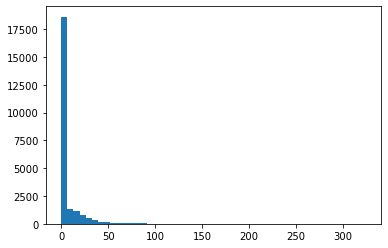

In [18]:
import matplotlib.pyplot as plt
print(len(near4[near4 < 1]))
plt.hist(near4.flatten(), bins=50)

In [19]:
block_net = network.Network([784,30,10], st = 30)
#block_net.SGD(training_data, 1, 10, 3.0, test_data=test_data)
block_net.weights = rule_net.weights
block_net.biases = rule_net.biases

In [20]:
cutoff = 1
print(len(block_net.weights[0][near4 < cutoff]))
block_net.weights[0][near4 < cutoff] = 0.0

17836


In [21]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)

block_net.SGD(training_data, 3, 10, 3.0, test_data=test_data)


Epoch 0 : 8967 / 10000
Epoch 1 : 9138 / 10000
Epoch 2 : 8956 / 10000


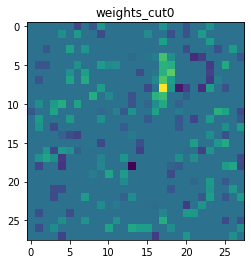

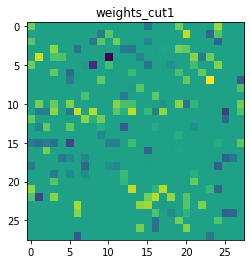

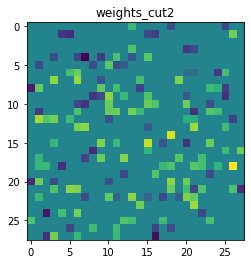

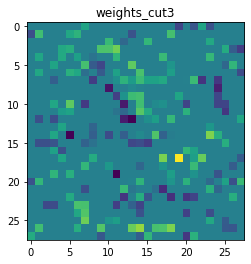

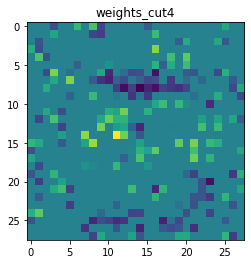

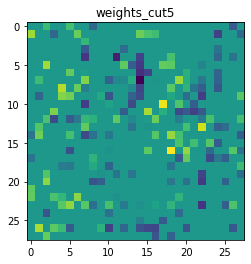

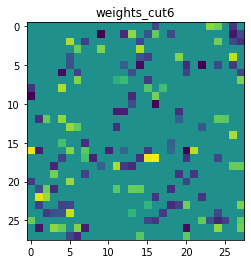

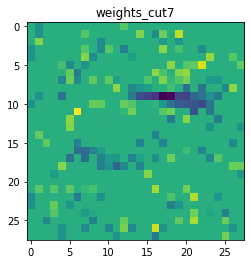

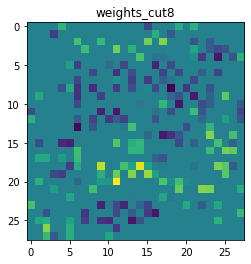

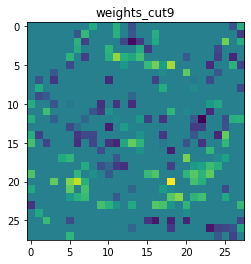

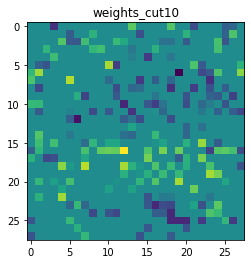

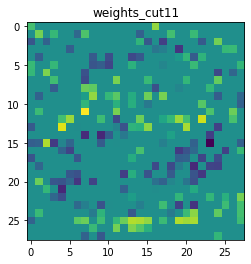

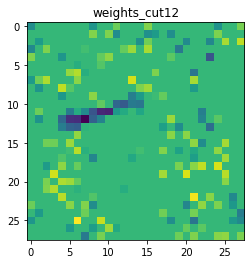

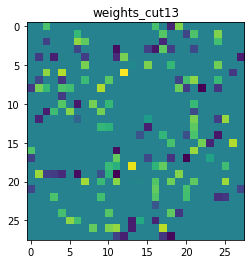

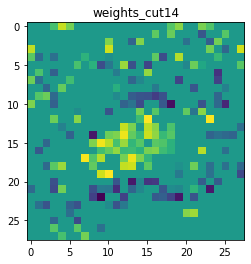

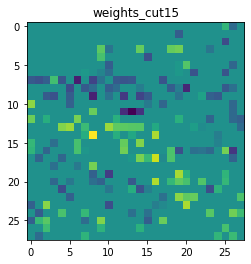

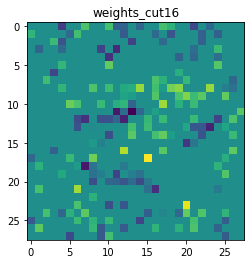

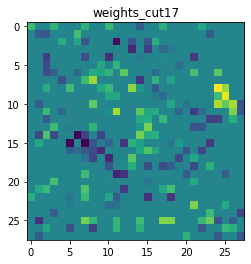

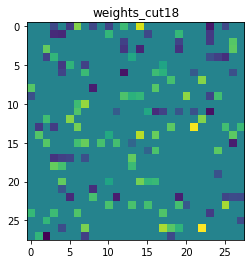

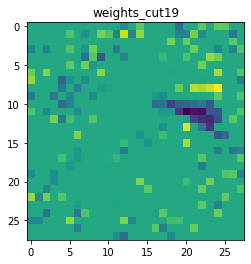

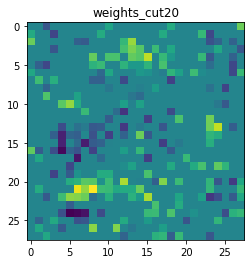

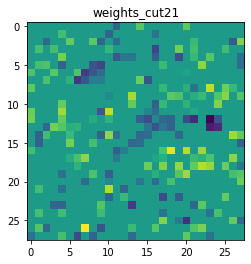

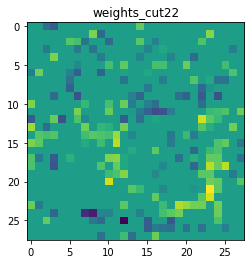

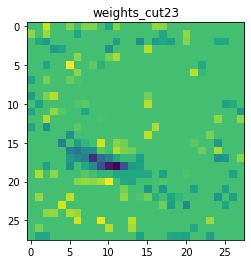

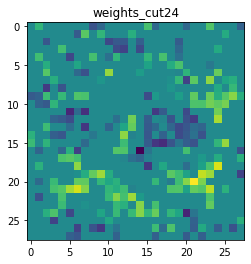

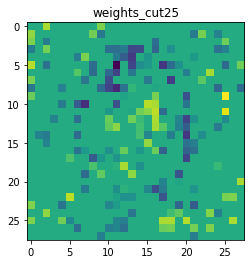

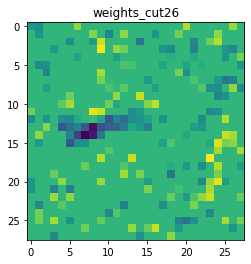

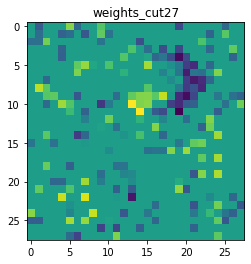

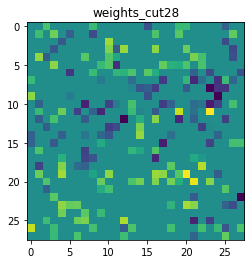

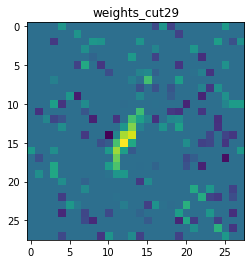

In [22]:
for i in range(30):
    img = block_net.weights[0][i].reshape(28,28)
    plt.imshow(img, interpolation='nearest')
   
    s = 'weights_cut' + str(i) 
    plt.title(s)
    plt.show()
    #plt.savefig(s + '.png')

In [16]:
weights10 = block_net.weights[0]
weights11 = block_net.weights[1]
r = len(weights10[weights10 == 0.0]) + len(weights11[weights11 == 0.0])
print("sparsity: " , r, " / 23820 = "  , (r/23820) * 100 , "%" )

NameError: name 'block_net' is not defined

In [33]:
k = 2
near2 = np.empty([30,784])
for h in range(30):
    img = rule_net.weights[0][h].reshape(28,28)
    for i in range(28):
        for j in range(28):
            done = {}
            if(img[i,j] == 0.0):
                near2[h, (28 * i) + j] = 0
            else:
                relative = nearest(k,i,j, img, done) 
                near2[h, (28 * i) + j] = relative -  img[i,j]**2

            
near2

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 2.2773079 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 4.96515928, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

19841


(array([2.0789e+04, 1.0290e+03, 6.0200e+02, 3.3000e+02, 2.0400e+02,
        1.3600e+02, 9.4000e+01, 7.6000e+01, 3.7000e+01, 2.6000e+01,
        2.9000e+01, 1.8000e+01, 9.0000e+00, 1.4000e+01, 1.8000e+01,
        4.0000e+00, 7.0000e+00, 5.0000e+00, 6.0000e+00, 2.0000e+00,
        6.0000e+00, 4.0000e+00, 1.0000e+01, 6.0000e+00, 3.0000e+00,
        7.0000e+00, 4.0000e+00, 4.0000e+00, 6.0000e+00, 7.0000e+00,
        7.0000e+00, 5.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 6.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  0.        ,   4.54496234,   9.08992468,  13.63488702,
         18.17984936,  22.7248117 ,  27.26977404,  31.81473638,
         36.35969872,  40.90466106,  45.4496234 ,  49.99458574,
         54.53954808,  59.08451042,  63.62947276,  68.1744351 ,
         72.71939744,  77.26435978,  81.80932212,  86.35428446

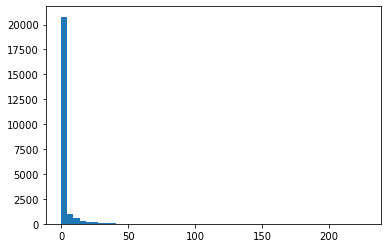

In [34]:
print(len(near2[near2 == 0.0]))
plt.hist(near2.flatten(), bins=50)

In [35]:
block_net_harsh = network.Network([784,30,10], st = 30)
#block_net.SGD(training_data, 1, 10, 3.0, test_data=test_data)
block_net_harsh.weights = rule_net.weights
block_net_harsh.biases = rule_net.biases
cutoff = 0.0
print(len(block_net_harsh.weights[0][near2 == cutoff]))
block_net_harsh.weights[0][near2 == cutoff] = 0.0
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)

block_net_harsh.SGD(training_data, 15, 10, 3.0, test_data=test_data)


19841
Epoch 0 : 8755 / 10000
Epoch 1 : 8987 / 10000
Epoch 2 : 8906 / 10000
Epoch 3 : 8467 / 10000
Epoch 4 : 8902 / 10000
Epoch 5 : 8764 / 10000
Epoch 6 : 8876 / 10000
Epoch 7 : 8997 / 10000
Epoch 8 : 8898 / 10000
Epoch 9 : 8744 / 10000
Epoch 10 : 8915 / 10000
Epoch 11 : 8669 / 10000
Epoch 12 : 8917 / 10000
Epoch 13 : 8888 / 10000
Epoch 14 : 8821 / 10000


In [ ]:
#sensitivity training - (before steep) go through each weight and make small change and measure change in error or just delete
# entirely and see what happens(?). Derivatives and stuff. !!During backprop if a weight doesnt change much, get rid of it
#or start with a randomly sparse network and see what goes down

#A way of seeing which weights never change
#Review old sparsing/pruning techniques

#Create a dummy function for matrix-vector multiplication and test what happens with low values weights dropped
#If any of the terms in the vector is below a threshold, store that it was. Repeat many many times (maybe every so often for an epoch)
#and if there are vectors at the end that were always insignificant dip em